In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=loadmat("cnDieselTrain.mat")

In [3]:
X=pd.DataFrame(data["cnTrainX"].T)
y=pd.DataFrame(data["cnTrainY"].T)
#print(X.head())

In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.006191,0.005554,0.004916,0.004278,0.003640,0.003003,0.002453,0.001864,0.001281,0.000745,...,0.060092,0.061456,0.060425,0.056491,0.049691,0.040802,0.031913,0.023024,0.014135,0.005246
1,0.006467,0.005708,0.004949,0.004189,0.003430,0.002671,0.002081,0.001423,0.000812,0.000289,...,0.050326,0.046921,0.041375,0.033703,0.025600,0.015505,0.005409,-0.004686,-0.014781,-0.024876
2,0.006227,0.005506,0.004786,0.004066,0.003346,0.002626,0.001999,0.001354,0.000758,0.000231,...,0.041781,0.036143,0.029385,0.021979,0.014282,0.005865,-0.002553,-0.010970,-0.019388,-0.027805
3,0.007022,0.006162,0.005302,0.004441,0.003581,0.002721,0.001974,0.001165,0.000422,-0.000226,...,0.059529,0.058182,0.054346,0.048187,0.039934,0.029773,0.019611,0.009450,-0.000711,-0.010872
4,0.005828,0.005223,0.004618,0.004012,0.003407,0.002802,0.002285,0.001732,0.001208,0.000727,...,0.050964,0.047001,0.041558,0.034620,0.026556,0.017491,0.008426,-0.000639,-0.009704,-0.018769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.005925,0.005294,0.004662,0.004030,0.003398,0.002766,0.002237,0.001668,0.001115,0.000625,...,0.054740,0.052071,0.047520,0.041260,0.033467,0.024312,0.015157,0.006003,-0.003152,-0.012306
129,0.006204,0.005468,0.004732,0.003996,0.003260,0.002523,0.001886,0.001187,0.000546,-0.000012,...,0.049184,0.043508,0.036558,0.028793,0.020469,0.011472,0.002475,-0.006522,-0.015519,-0.024516
130,0.006152,0.005445,0.004738,0.004031,0.003324,0.002617,0.002032,0.001387,0.000807,0.000298,...,0.052873,0.048125,0.041762,0.034223,0.025790,0.016387,0.006984,-0.002419,-0.011822,-0.021225
131,0.006140,0.005457,0.004774,0.004091,0.003408,0.002724,0.002160,0.001545,0.000950,0.000442,...,0.052246,0.048263,0.042582,0.035591,0.027506,0.018305,0.009103,-0.000099,-0.009301,-0.018503


In [50]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
min_max=StandardScaler()
X1=min_max.fit_transform(X)
#x_test=min_max.fit_transform(x_test)


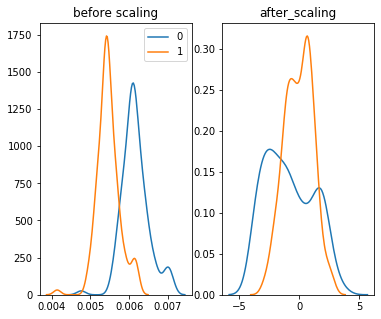

In [51]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title('before scaling')
sns.kdeplot(X[0],ax=ax1)
sns.kdeplot(X[1],ax=ax1)
ax2.set_title('after_scaling')
sns.kdeplot(X1[0],ax=ax2)
sns.kdeplot(X1[1],ax=ax2)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.2)

In [53]:
from sklearn.svm import SVR

In [54]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


ValueError: x and y must be the same size

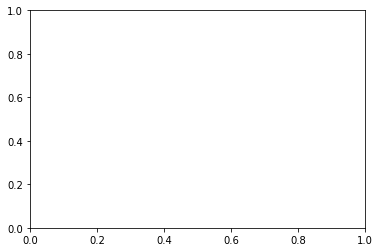

In [32]:
#t=pd.DataFrame(x_train)
plt.scatter(x_train,y_train)


(array([ 1.,  4.,  7., 21., 26., 25.,  9.,  7.,  5.,  1.]),
 array([-37.25888134, -29.61802878, -21.97717621, -14.33632365,
         -6.69547108,   0.94538148,   8.58623404,  16.22708661,
         23.86793917,  31.50879174,  39.1496443 ]),
 <a list of 10 Patch objects>)

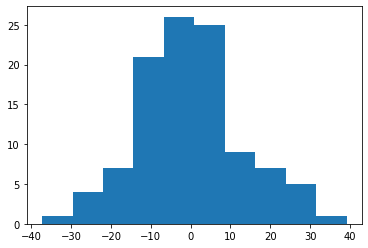

In [11]:
plt.hist(x_train)

In [12]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(SVR(),param_grid=parameters,scoring='neg_mean_squared_error',cv=10)

In [13]:
grid_search.fit(x_train,y_train)



GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [14]:
grid_search.best_params_

{'C': 10, 'kernel': 'linear'}

In [15]:
n_estimators=[500,800,1500,2500,5000]
max_features=['auto','sqrt','log2']
max_depth=[10,20,30,40,50]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15]
grid_para={'n_estimators':n_estimators,'max_features':max_features,
          'max_depth':max_depth,'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf}


In [16]:
'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1)
rfr_rnadom=RandomizedSearchCV(estimator=rfr,param_distributions=grid_para
                             ,n_iter=500,cv=10
                             ,random_state=40)
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\nrfr=RandomForestRegressor(random_state=1)\nrfr_rnadom=RandomizedSearchCV(estimator=rfr,param_distributions=grid_para\n                             ,n_iter=500,cv=10\n                             ,random_state=40)\n'

In [17]:
#rfr_rnadom.fit(x_train,y_train)


In [55]:
x_train1=x_train

In [56]:
x_train1.shape

(106, 15)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [58]:
models=[]
models.append(("Linear",LinearRegression()))
models.append(("SVR",SVR(kernel='linear',C=1)))
models.append(("KNNR",KNeighborsRegressor(n_neighbors=15)))
models.append(("poly",LinearRegression()))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=10)
    if (name=='poly'):
        poly_features=PolynomialFeatures(degree=4)
        x_train1=poly_features.fit_transform(x_train1)
    cv_results=cross_val_score(model,x_train1,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    #print(cv_results)
    msg="%s,%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
   

Linear,-5.668794(4.991409)
SVR,-6.119636(4.796644)
KNNR,-6.452679(2.514621)
poly,-333591.060659(988390.762262)


In [24]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred_lr=Lr.predict(x_test)
y_pred_train_lr=Lr.predict(x_train)

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

print(r2_score(y_test,y_pred_lr))

1.4966316804051227
2.9993843746627733
0.6703626138623306


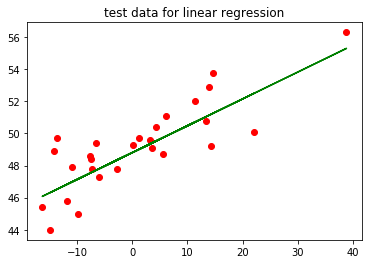

In [27]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred_lr,color='green')
plt.title('test data for linear regression')
plt.show()

root mean square error of train data using linear regression 2.9993843746627733
r2_score of linear regression for train data 0.3530377495138569


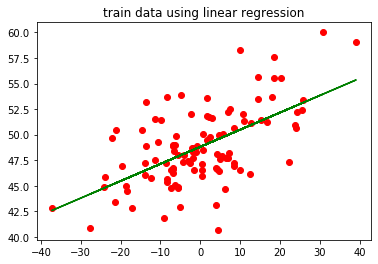

In [48]:
print("root mean square error of train data using linear regression",np.sqrt(mean_squared_error(y_train,y_pred_train_lr)))
print("r2_score of linear regression for train data",r2_score(y_train,y_pred_train_lr))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,y_pred_train_lr,color='green')
plt.title('train data using linear regression')
plt.show()

In [49]:
svm1=SVR(kernel='linear',C=10)
svm1.fit(x_train,y_train)
y_pred_svm=svm1.predict(x_test)
y_pred_train_svm=svm1.predict(x_train)

In [47]:
print("test data root mean square error",np.sqrt(mean_squared_error(y_test,y_pred_svm)))
print("r2_score of svr using linaer kernel ",r2_score(y_test,y_pred_svm))

test data root mean square error 1.534596437705426
r2_score of svr using linaer kernel  0.6534268089460884


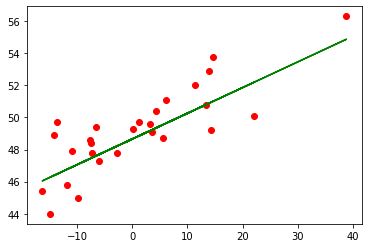

In [39]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred_svm,color='green')

In [51]:
print("train data root men square error:",np.sqrt(mean_squared_error(y_train,y_pred_train_svm)))
print("r2_score of train data using svm kernel linear and c=10 is",r2_score(y_train,y_pred_train_svm))

train data root men square error: 3.0045609143529375
r2_score of train data using svm kernel linear and c=10 is 0.35080268035554607


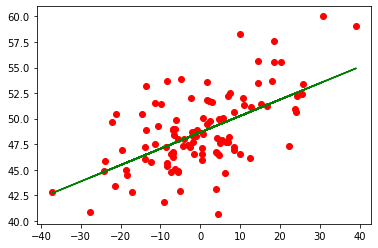

In [41]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,y_pred_train_svm,color='green')

In [59]:
import matplotlib.pyplot as plt

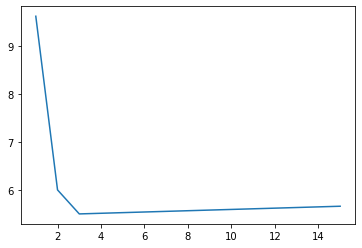

In [60]:
lr=[9.617,6,5.5,5.66]
lr_sd=[3.49,2.76,2.64,5.49]
nc=[1,2,3,15]
plt.plot(nc,lr)

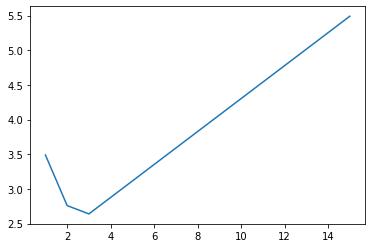

In [61]:
plt.plot(nc,lr_sd)